In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET

In [2]:
dataset = pd.read_excel('HousePricePrediction.xlsx')
dataset

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [4]:
dataset.shape

(2919, 13)

## PREPROCESSING

1. Categorizamos las caracteristicas segun tipo de datos y luego calculamos el numero de ellas

In [9]:
dataset.dtypes
##los object son datos categoricos

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [195]:
##Vemos y guardamos cuantas variables de cada tipo tenemos
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int = (dataset.dtypes == 'int64')
int_cols = list(int[int].index)
print("Integer variables:",len(int_cols))

float = (dataset.dtypes == 'float64')
float_cols = list(float[float].index)
print("Float variables:",len(float_cols))

Categorical variables: 4
Integer variables: 5
Float variables: 3


## Exploratory Data Analys (EDA)
EDA se refiera al análisis profundo de datos para descubrir anomalias y diferentes patrones. Antes de hacer inferencias a partir de datos es escencial examinar todas las variables

<Axes: >

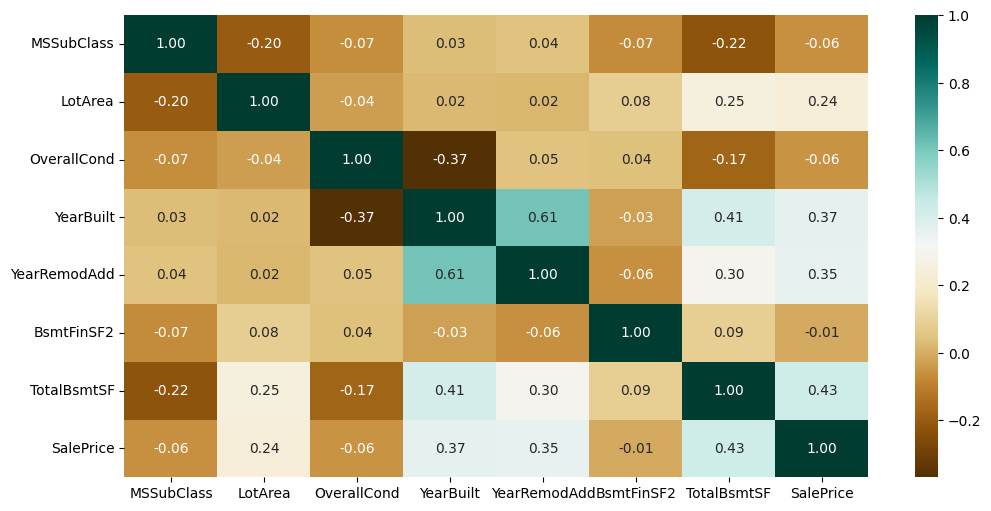

In [197]:
#creamos un dataframe solo con valores numericos
df = pd.DataFrame(dataset)
df_numeric = df.select_dtypes(include = 'number')
#mostramos la correlación con el metodo .corr
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(),
            cmap='BrBG',
           fmt='.2f',
           annot=True)

<Axes: title={'center': 'Nro de valores unicos en las categorias'}>

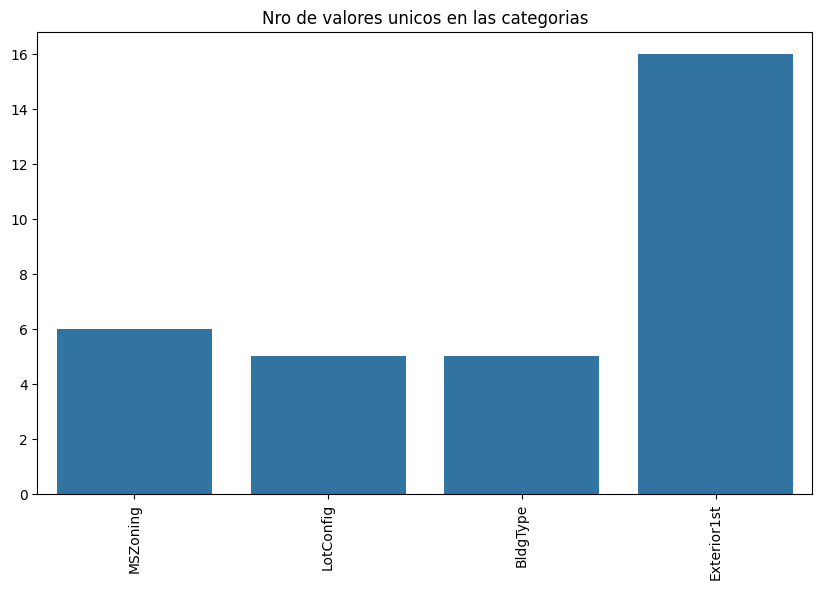

In [113]:
#ahora analizamos los datos categoricos

#para ver cuantos valores tenemos en cada dato categorico:
#creamops una variable que guarde las cantidades para cada uno

unique_values = []

#en este for iteramos por cada columna agregando en la variable la cantidad de opciones de cada dato categorico
#el metodo .unique guarda una lista de cada opcion(variable) sin que se repita
#y el metodo size cuenta la cantidad de opciones, este es el dato que se guarda en la varible unique_values

for col in object_cols:
    unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10,6))
plt.title('Nro de valores unicos en las categorias')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)

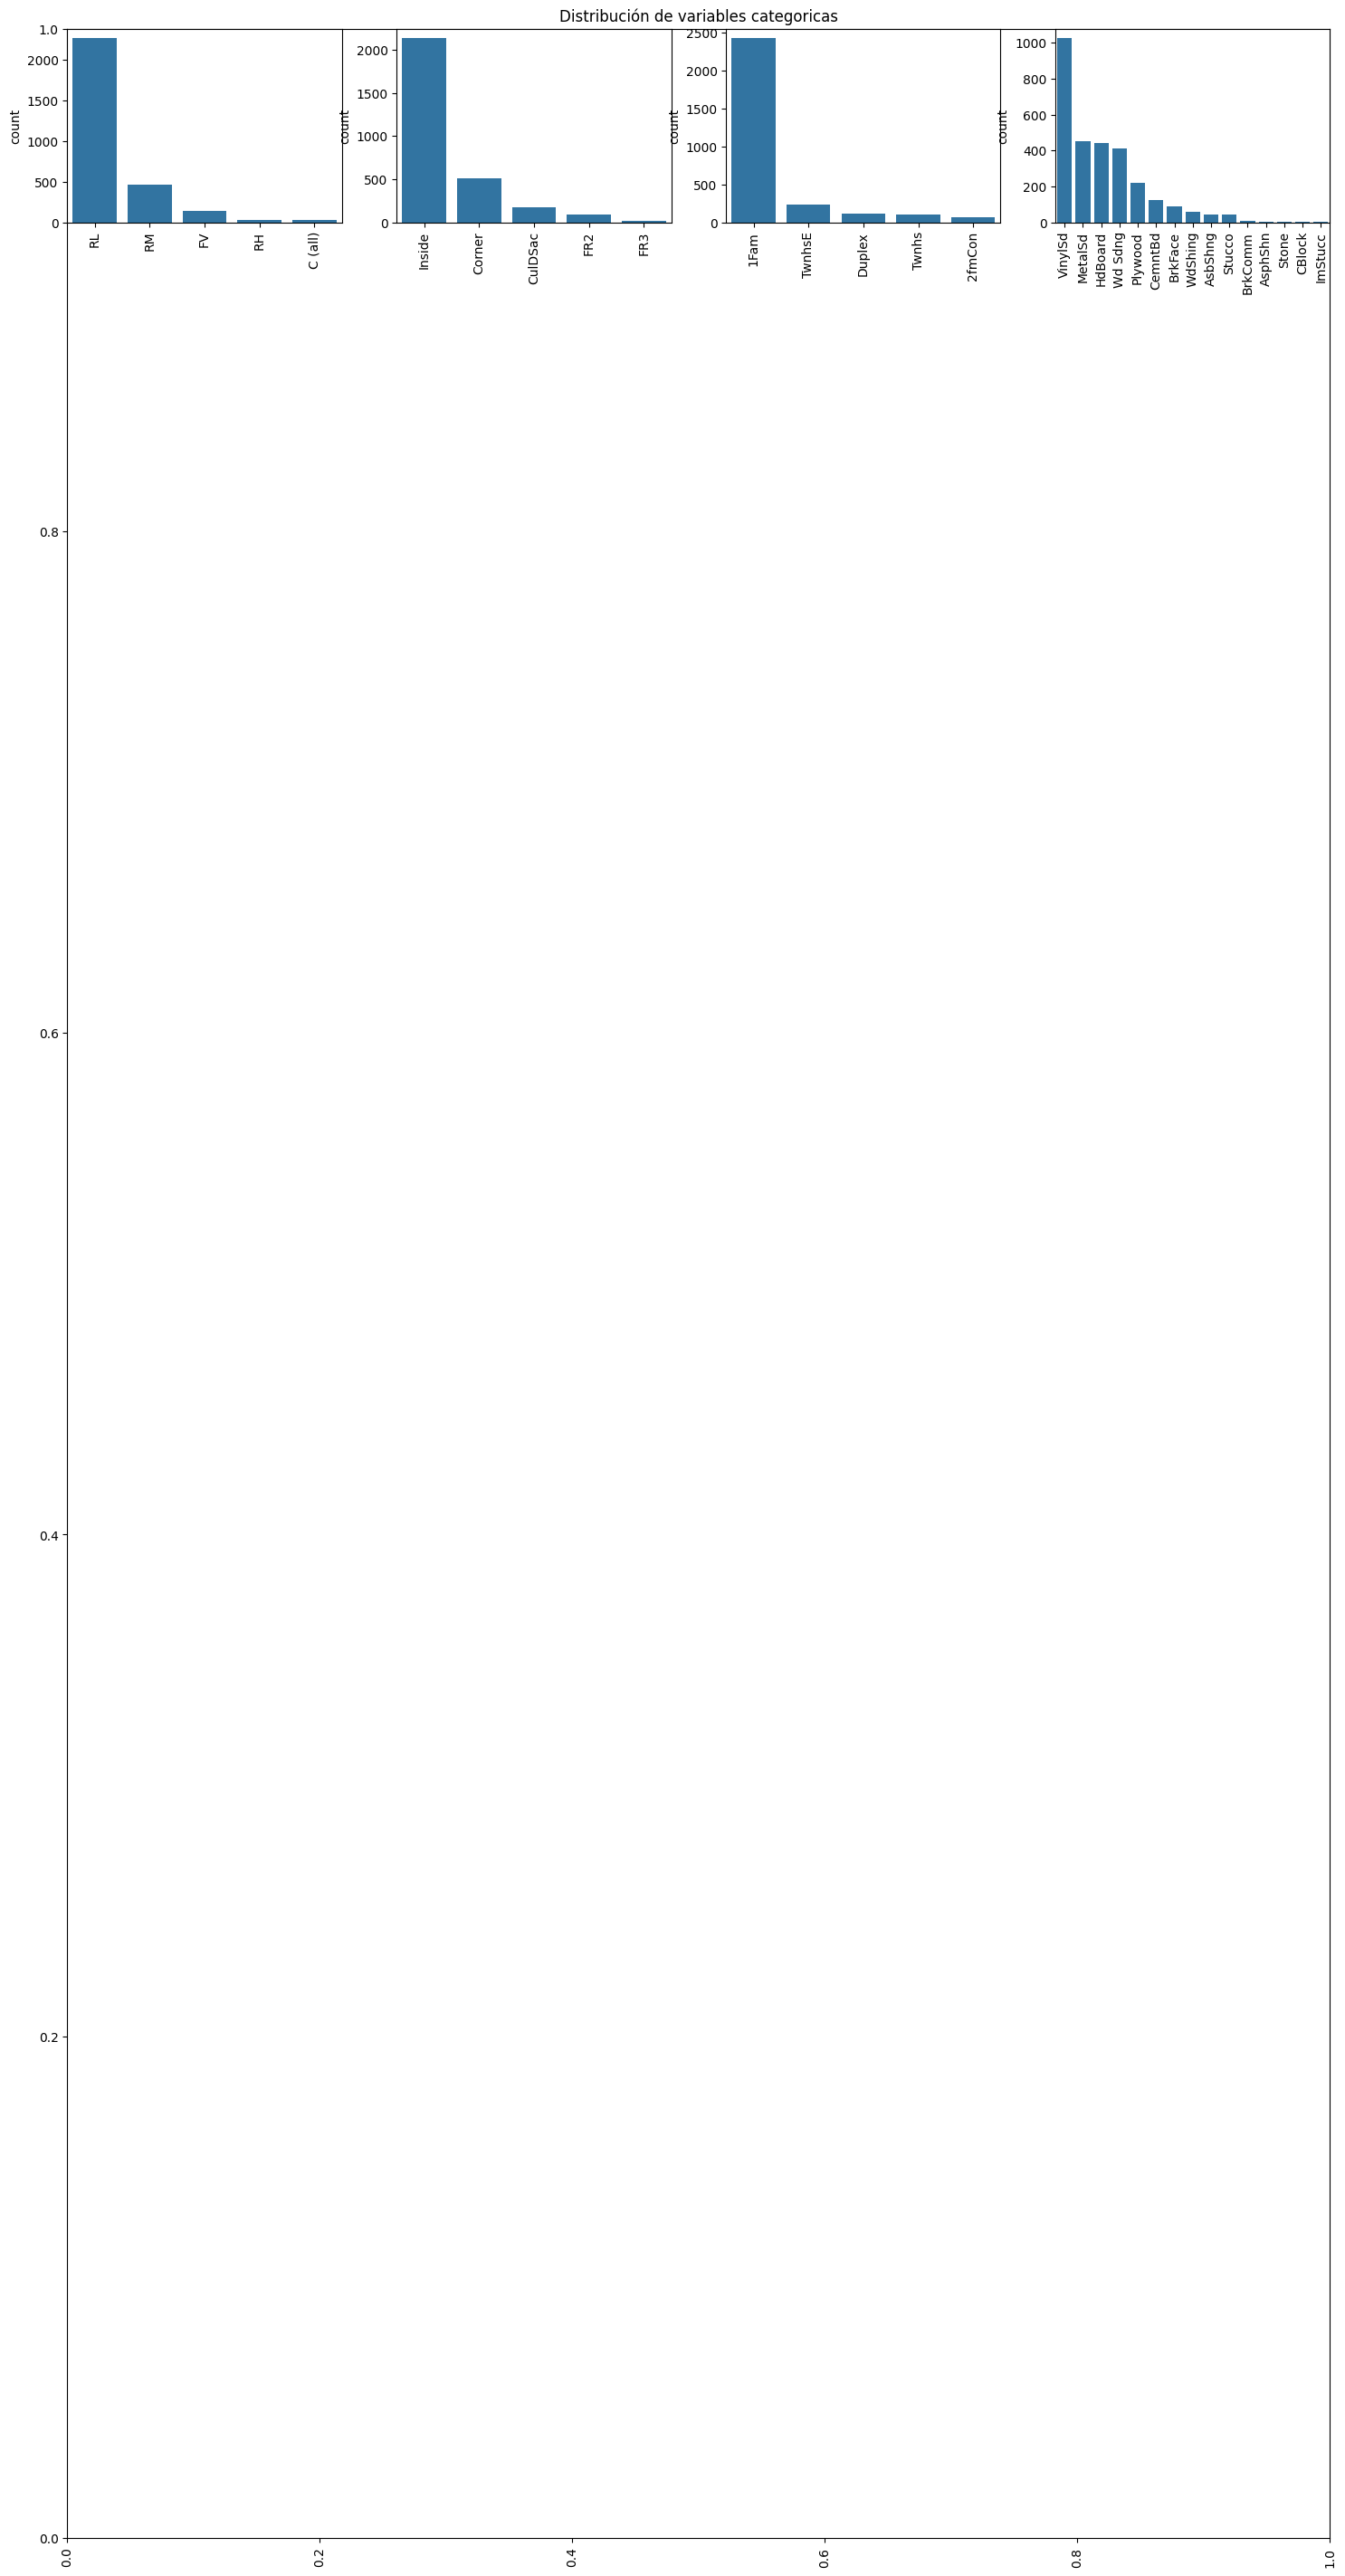

In [79]:
#Podemos graficar las variables categoricas con respecto a cada valor, para identificar rapidamente las de mayor peso

plt.figure(figsize=(18,36))
plt.title('Distribución de variables categoricas')
plt.xticks(rotation=90)
index=1

for col in object_cols:
    y = dataset[col].value_counts() #guarda en Y el nombre de cada opcion y su respectiva cantidad
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

## DATA CLEANING

In [ ]:
#borramos la columna ID que no tiene uso

dataset.drop(['Id'], axis=1, inplace=True)

In [109]:
#Reemplazamos los valores vacios del precio de ventas por la media para hacer que la distribucion de datos sea simetrica.

dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

#eliminamos los registros con valores nulos

new_dataset = dataset.dropna()

In [110]:
#verificamos si hay caracteristicas con valores nulos, esta funcion nos devuelve dicha informacion
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## ONEHOTENCODER FOR CATEGORICAL FUNCTIONS LABELS

In [138]:
#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print('Variables categoricas:')
print(object_cols)
print('Numero de variables categoricas: ', len(object_cols))

Variables categoricas:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Numero de variables categoricas:  4


In [159]:
OH_enconder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_enconder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_enconder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

## SPLIT DATASET IN TRAINING AND TESTING

In [164]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [165]:
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size=0.08, test_size=0.2, random_state=0)

## MODEL AND ACCURACY

## 1. Modelo SVM - maquina de vectores de soporte

In [166]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

In [168]:
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18705131500666133


In [175]:
#import statsmodels.api as sm
#X_2 = sm.add_constant(X)
#results = sm.OLS(Y,X_2).fit()
#results.summary()

## 2. Modelo Random Forest

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.2009540378321077

## 3. Modelo Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression

In [182]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.1995034387029804

## 4. Clasificador Catboost

In [187]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [189]:
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)
cb_r2_score = r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.032525
0:	learn: 48801.2730113	total: 1.06ms	remaining: 1.06s
1:	learn: 48577.9364357	total: 1.95ms	remaining: 975ms
2:	learn: 48410.7487646	total: 2.79ms	remaining: 929ms
3:	learn: 48125.9608850	total: 3.71ms	remaining: 925ms
4:	learn: 47986.3358505	total: 4.61ms	remaining: 918ms
5:	learn: 47872.5678802	total: 5.34ms	remaining: 885ms
6:	learn: 47720.3210284	total: 6.22ms	remaining: 883ms
7:	learn: 47628.4182640	total: 6.87ms	remaining: 852ms
8:	learn: 47497.7072013	total: 7.75ms	remaining: 854ms
9:	learn: 47359.4270152	total: 8.7ms	remaining: 862ms
10:	learn: 47238.0264590	total: 9.34ms	remaining: 840ms
11:	learn: 46923.3460135	total: 10.2ms	remaining: 842ms
12:	learn: 46654.9930301	total: 11.1ms	remaining: 847ms
13:	learn: 46348.6537258	total: 12.3ms	remaining: 863ms
14:	learn: 46194.8295326	total: 13.1ms	remaining: 860ms
15:	learn: 46006.8810137	total: 14ms	remaining: 861ms
16:	learn: 45761.1016498	total: 14.8ms	remaining: 858ms
17:	learn: 45639.6579420	total:

0.192948561309778